In [1]:
import pandas as pd

importing data

In [2]:
ufo_data = pd.read_csv("ufo_sighting_data.csv")
moon_data_raw = pd.read_html("lunar_calendar.html")
meteorite_data = pd.read_csv("meteorite_data.csv")

C:\Users\robertaparna\AppData\Local\Temp\ipykernel_22396\692714877.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo_data = pd.read_csv("ufo_sighting_data.csv")


### CREATING A MODEL FOR PREDICTING UFO SHAPE

In [4]:
#disregarding colums that won't be useful
ufo_data = ufo_data.drop(['described_duration_of_encounter', 'description', 'city', 'state/province', 'latitude', 'longitude'], axis=1)
ufo_data = ufo_data.dropna()

#changing invalid values
ufo_data['Date_time'] = ufo_data['Date_time'].str.replace('24:','00:')
ufo_data['length_of_encounter_seconds'] = ufo_data['length_of_encounter_seconds'].str.replace('`', '')
#ufo_data['latitude'] = ufo_data['latitude'].str.replace('q', '')

ufo_data = pd.get_dummies(ufo_data, columns=['country'])

ufo_data_clone = ufo_data.copy()

In [5]:
#balancing
shapes_value_counts = ufo_data['UFO_shape'].value_counts()

shapes = ufo_data['UFO_shape'].unique()
samples = []

for shape in shapes:

    if (shapes_value_counts[shape] > 1177):
        samples.append(ufo_data[ufo_data['UFO_shape'] == shape].sample(1177))
        
ufo_data = pd.concat(samples)


In [6]:
#preparing
ufo_data['Date_time'] = pd.to_datetime(ufo_data['Date_time'])

ufo_data['date_documented'] = pd.to_datetime(ufo_data['date_documented'])
ufo_data['UFO_shape'] = ufo_data['UFO_shape'].astype('category')
ufo_data['UFO_shape_cat'] = ufo_data['UFO_shape'].cat.codes
categories = dict(enumerate(ufo_data['UFO_shape'].cat.categories))
ufo_data = ufo_data.drop(['UFO_shape'], axis=1)

In [7]:
#model is more accurate without

#ufo_data['incident_year'] = ufo_data['Date_time'].dt.year
#ufo_data['incident_month'] = ufo_data['Date_time'].dt.month
#ufo_data['incident_day'] = ufo_data['Date_time'].dt.dayofweek
ufo_data['incident_hour'] = ufo_data['Date_time'].dt.hour
ufo_data['incident_minute'] = ufo_data['Date_time'].dt.minute

#feels like an unnececcary  feature and the model is more accurate without

#ufo_data['documentation_year'] = ufo_data['date_documented'].dt.year
#ufo_data['documentation_month'] = ufo_data['date_documented'].dt.month
#ufo_data['documentation_day'] = ufo_data['date_documented'].dt.day

ufo_data = ufo_data.drop(['Date_time', 'date_documented'], axis=1)
ufo_data = ufo_data.dropna()

In [8]:
from sklearn.model_selection import train_test_split

#splitting into features and labels
ufo_data_X = ufo_data.drop(['UFO_shape_cat'], axis=1)
ufo_data_y = ufo_data['UFO_shape_cat']

X_train, X_test, y_train, y_test = train_test_split(ufo_data_X, ufo_data_y, test_size = 0.1)

In [9]:
from sklearn.tree import DecisionTreeClassifier

#training a model

model1 = DecisionTreeClassifier(criterion='entropy', max_depth = 4, random_state=5).fit(X_train, y_train)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef, cohen_kappa_score

#getting the predictions and using different metrics to evaluate the model

predictions = model1.predict(X_test)
confusion_matrix(y_test, predictions)

array([[39, 14,  0,  0,  7, 24,  0,  0,  0,  0, 23,  0],
       [26, 32,  0,  0,  8, 14,  0,  0,  0,  0, 16,  0],
       [24, 11,  0,  0, 10, 25,  0,  0,  0,  0, 20,  0],
       [34, 18,  0,  0,  3, 21,  0,  0,  0,  0, 29,  0],
       [14, 13,  0,  0, 21, 27,  0,  0,  0,  0, 24,  0],
       [22, 16,  0,  0, 12, 25,  0,  0,  0,  0, 28,  0],
       [27,  6,  0,  0, 12, 21,  0,  0,  0,  0, 18,  0],
       [24, 15,  0,  0,  4, 18,  0,  0,  0,  0, 20,  0],
       [20, 16,  0,  0,  6, 20,  0,  0,  0,  0, 23,  0],
       [41, 19,  0,  0, 12, 27,  0,  0,  0,  0, 16,  0],
       [19, 14,  0,  0,  5, 27,  0,  0,  0,  0, 29,  0],
       [32, 13,  0,  0,  3, 29,  0,  0,  0,  0, 19,  0]], dtype=int64)

In [11]:
accuracy_score(y_test, predictions)

0.1264069264069264

In [12]:
matthews_corrcoef(y_test, predictions)

0.04662219745932424

In [13]:
cohen_kappa_score(y_test, predictions)

0.04309380742570268

there are 16 classes in the train-test set, so random guessing would have 0.0625% accuracy. the accuracy score shows that this model can predict twice as accurately. the other metrics are not as optimistic, while they show that this model is slightly better than random guessing, it is still not very good.

### CREATING A MODEL FOR PREDICTING DURATION

In [14]:
#preparing again
ufo_data= ufo_data_clone

ufo_data['Date_time'] = pd.to_datetime(ufo_data['Date_time'])

ufo_data['date_documented'] = pd.to_datetime(ufo_data['date_documented'])
ufo_data = pd.get_dummies(ufo_data, columns=['UFO_shape'])

ufo_data['incident_hour'] = ufo_data['Date_time'].dt.hour
ufo_data['incident_minute'] = ufo_data['Date_time'].dt.minute
#ufo_data['incident_year'] = ufo_data['Date_time'].dt.year
#ufo_data['incident_month'] = ufo_data['Date_time'].dt.month
#ufo_data['incident_day'] = ufo_data['Date_time'].dt.dayofweek

ufo_data = ufo_data.drop(['Date_time', 'date_documented'], axis=1)
ufo_data = ufo_data.dropna()

ufo_data_X = ufo_data.drop(['length_of_encounter_seconds'], axis=1)
ufo_data_y = ufo_data['length_of_encounter_seconds']

X_train, X_test, y_train, y_test = train_test_split(ufo_data_X, ufo_data_y, test_size = 0.1)

In [24]:
from scipy import stats
#trying to balance the training data

y_train_balanced, _lambda = stats.boxcox(y_train.astype('float'))
print(y_train_balanced)

[0.6972037  4.98553759 6.75376979 ... 5.42650709 5.98636141 3.50037159]


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model2 = LinearRegression().fit(X_train, y_train_balanced)

<AxesSubplot:>

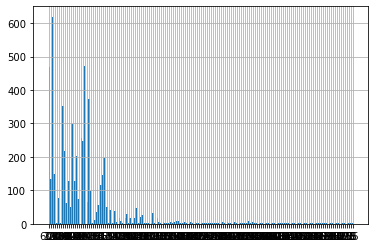

In [26]:
import matplotlib.pyplot as plt
predictions = model2.predict(X_test)

results = pd.DataFrame()

y_test.hist(bins=200)

In [27]:
r2_score(y_test, predictions)

-0.002684974934616502

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, predictions)

1855.6349776922755

In [29]:
mean_squared_error(y_test, predictions)

1285587090.6447108

all the metrics show that this model is not very accurate at all no matter what features we try to use, which suggests that the duration of encounters cannot be predicted from time and location

### FINDING A CORRELATION BETWEEN SIGHTINGS AND MOON PHASES


In [48]:
ufo_data = ufo_data_clone


In [46]:
#making a usable dataframe
moon_data = moon_data_raw[0]
moon_data = moon_data.drop(['Unnamed: 0'], axis= 1)
moon_data = moon_data.rename(columns = {'Unnamed: 1' : 'new_moons', 'Unnamed: 2' : 'first_quarter_moon', 'Unnamed: 3' : 'full_moons', 'Unnamed: 4' : 'third_quarter_moons'})
moon_data = moon_data.drop([0, 1])
moon_data

#disregarding data with dates out ouf sightings data scope
moon_data['full_moons'] = pd.to_datetime(moon_data['full_moons'])
moon_data['new_moons'] = pd.to_datetime(moon_data['new_moons'])
moon_data['first_quarter_moon'] = pd.to_datetime(moon_data['first_quarter_moon'])
moon_data['third_quarter_moons'] = pd.to_datetime(moon_data['third_quarter_moons'])
moon_data = moon_data[moon_data['full_moons'] >= pd.to_datetime("10/10/1949") ]
moon_data = moon_data[moon_data['full_moons'] <= pd.to_datetime('31/12/2013')]

moon_data  

moon_data1 = pd.DataFrame()
moon_data2 = pd.DataFrame()
moon_data3 = pd.DataFrame()
moon_data4 = pd.DataFrame()

moon_data1['date'], moon_data1['phase'] = [moon_data["new_moons"], 'new_moon']
moon_data2['date'], moon_data2['phase'] = [moon_data["full_moons"], 'full_moons']
moon_data3['date'], moon_data3['phase'] = [moon_data["first_quarter_moon"], 'first_quarter_moon']
moon_data4['date'], moon_data4['phase'] = [moon_data["third_quarter_moons"], 'third_quarter_moons']

moon_data = pd.concat([moon_data1, moon_data2, moon_data3, moon_data4])
moon_data =moon_data.sort_values(by = ['date'])
moon_data

C:\Users\robertaparna\AppData\Local\Temp\ipykernel_22396\2423268326.py:14: UserWarning: Parsing '31/12/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  moon_data = moon_data[moon_data['full_moons'] <= pd.to_datetime('31/12/2013')]


,date,phase
623,1949-11-05,full_moons
624,1949-12-05,full_moons
625,1950-01-03,full_moons
623,1950-01-18,new_moon
623,1950-01-25,first_quarter_moon
...,...,...
1415,2014-02-06,first_quarter_moon
1416,2014-02-22,third_quarter_moons
1415,2014-03-01,new_moon
1416,2014-03-08,first_quarter_moon


In [75]:
import datetime

def count_sightings(x):
    sightings = 0
    
    x_1 = x + datetime.timedelta(days=1)
    x_2 = x - datetime.timedelta(days=1)
    
    try:
        sightings += ufo_data['Date_time'].value_counts()[x].sum()
    except:
        pass
    
    try:
        pass
        #sightings += ufo_data['Date_time'].value_counts()[x_1].sum()
    except:
        pass
    
    try:
        pass
        #sightings += ufo_data['Date_time'].value_counts()[x_2].sum()
    except:
        pass
    
    return sightings
    
    

moon_data['sightings'] = [count_sightings(x) for x in moon_data['date']]
moon_data

,date,phase,sightings
623,1949-11-05,full_moons,0
624,1949-12-05,full_moons,0
625,1950-01-03,full_moons,0
623,1950-01-18,new_moon,0
623,1950-01-25,first_quarter_moon,0
...,...,...,...
1415,2014-02-06,first_quarter_moon,0
1416,2014-02-22,third_quarter_moons,0
1415,2014-03-01,new_moon,2
1416,2014-03-08,first_quarter_moon,2


In [83]:
count = moon_data.groupby(['phase'])['sightings'].sum()
count

phase
first_quarter_moon     62
full_moons             67
new_moon               92
third_quarter_moons    55
Name: sightings, dtype: int64

chi-square test

In [81]:
expected = count.sum() / 4
print(expected)



69.0


In [82]:
x_2 = ((count[0]-expected)**2)/expected + ((count[1]-expected)**2)/expected + ((count[2]-expected)**2)/expected + ((count[3]-expected)**2)/expected

x_2

11.27536231884058

at significance level 0.025 this data is significantly different from what was expected. 

when counting all the ufo sightings that have taken place during primary moon phases, we can see that sightings are disproportionately more likely to occur during the new moon

### FINDING A CORRELATION BETWEEN METEORITE LANDINGS AND UFO SIGHTINGS

In [86]:
meteorite_data

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...
2823,Zillah 002,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037000, 17.018500)"
2824,Zinder,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.783330, 8.966670)"
2825,Zlin,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.250000, 17.666670)"
2826,Zubkovsky,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.789170, 41.504600)"


In [104]:
meteorite_data['longitude'] = meteorite_data['GeoLocation'].str.split(', ').str[0].str[1:]
meteorite_data['latitude'] = meteorite_data['GeoLocation'].str.split(', ').str[1].str[:-2]
meteorite_data.drop(['GeoLocation'], axis= 1)


,name,nametype,recclass,mass (g),fall,year,reclat,reclong,longitude,latitude
0,Aachen,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,50.775000,6.08333
1,Aarhus,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,56.183330,10.23333
2,Abee,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,54.216670,-113.00000
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,16.883330,-99.90000
4,Achiras,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,-33.166670,-64.95000
...,...,...,...,...,...,...,...,...,...,...
2823,Zillah 002,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,29.037000,17.01850
2824,Zinder,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,13.783330,8.96667
2825,Zlin,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,49.250000,17.66667
2826,Zubkovsky,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,49.789170,41.50460
